# EDA

hello , this is a notebook for analysing the results.csv

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sorting_algorithm_results.csv')

df

,Algorithm,Array Size,Scenario,Comparisons,Moves,Time (s)
0,Selection Sort,1000,random,499500,2000,0.178868
1,Bubble Sort,1000,random,499500,511990,0.298660
2,Insertion Sort (Exchange),1000,random,256988,511990,0.219682
3,Insertion Sort (Shift),1000,random,256994,256994,0.147740
4,Selection Sort,1000,ascending,499500,2000,0.161777
5,Bubble Sort,1000,ascending,499500,0,0.150564
6,Insertion Sort (Exchange),1000,ascending,999,0,0.015670
7,Insertion Sort (Shift),1000,ascending,999,999,0.000000
8,Selection Sort,1000,descending,499500,2000,0.132810
9,Bubble Sort,1000,descending,499500,999000,0.397274


In [23]:
group_columns = ['Algorithm', 'Array Size', 'Scenario']
cal_columns = ['Comparisons', 'Moves', 'Time (s)']

In [24]:
group_df = df.groupby(group_columns, as_index=False).mean()

In [25]:
calculated_results = group_df[group_columns+cal_columns]

calculated_results

,Algorithm,Array Size,Scenario,Comparisons,Moves,Time (s)
0,Bubble Sort,1000,ascending,499500.0,0.0,0.150564
1,Bubble Sort,1000,descending,499500.0,999000.0,0.397274
2,Bubble Sort,1000,random,499500.0,511990.0,0.298660
3,Bubble Sort,10000,ascending,49995000.0,0.0,16.754018
4,Bubble Sort,10000,descending,49995000.0,99990000.0,43.559069
5,Bubble Sort,10000,random,49995000.0,49964078.0,33.737662
6,Insertion Sort (Exchange),1000,ascending,999.0,0.0,0.015670
7,Insertion Sort (Exchange),1000,descending,499500.0,999000.0,0.373084
8,Insertion Sort (Exchange),1000,random,256988.0,511990.0,0.219682
9,Insertion Sort (Exchange),10000,ascending,9999.0,0.0,0.007456


In [26]:
function_names = list(calculated_results['Algorithm'].unique())
function_names

['Bubble Sort',
 'Insertion Sort (Exchange)',
 'Insertion Sort (Shift)',
 'Selection Sort']

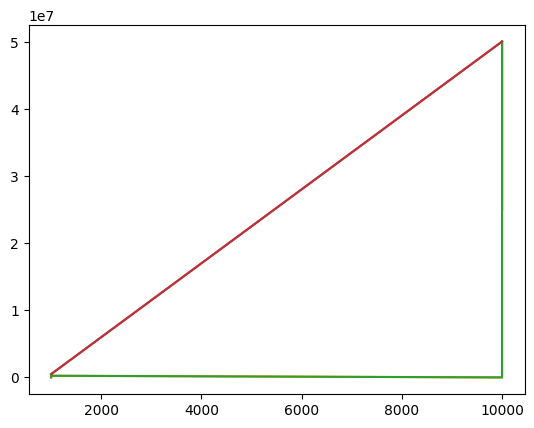

In [27]:
for function_name in function_names:
    df_plot = calculated_results[calculated_results['Algorithm'] == function_name]
    plt.plot(df_plot['Array Size'], df_plot['Comparisons'],label=function_name)



In [28]:
calculated_results[calculated_results['Algorithm'] == 'Bubble Sort']['Comparisons'].describe()

count    6.000000e+00
mean     2.524725e+07
std      2.710980e+07
min      4.995000e+05
25%      4.995000e+05
50%      2.524725e+07
75%      4.999500e+07
max      4.999500e+07
Name: Comparisons, dtype: float64

In [29]:
df_plot = calculated_results[calculated_results['Algorithm'] == 'Bubble Sort']

In [30]:
from complexity import get_complexity

x_plot = df_plot['Array Size']
y_plot = df_plot['Comparisons'] 

get_complexity(x_plot,y_plot)


'O(n2)'